In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
#Medição do erro pelo método RMSE
#Aonde P são os dados da predição e X são os dados de verificação, n é quantidade de amostras.
def RMSE(pred, x):
    n = pred.shape[0]
    return np.sqrt(np.sum((pred-x)**2)/n)

In [3]:
#Leitura da base de dados
nba = pd.read_csv('players_stats_new.csv')
nba

,Name,Games Played,MIN,PTS,FGA,FGM,FG%,3PM,3PA,3P%,...,Birth_Place,Birthdate,Collage,Experience,Pos,Team,Age,Height,Weight,BMI
0,AJ Price,26,324,133,137,51,37.2,15,57,26.3,...,us,7-Oct-86,University of Connecticut,5,PG,PHO,29,185.0,81.45,23.798393
1,Aaron Brooks,82,1885,954,817,344,42.1,121,313,38.7,...,us,14-Jan-85,University of Oregon,6,PG,CHI,30,180.0,72.45,22.361111
2,Aaron Gordon,47,797,243,208,93,44.7,13,48,27.1,...,us,16-Sep-95,University of Arizona,R,PF,ORL,20,202.5,99.00,24.142661
3,Adreian Payne,32,740,213,220,91,41.4,1,9,11.1,...,us,19-Feb-91,Michigan State University,R,PF,ATL,24,205.0,106.65,25.377751
4,Al Horford,76,2318,1156,965,519,53.8,11,36,30.6,...,do,3-Jun-86,University of Florida,7,C,ATL,29,205.0,110.25,26.234384
5,Al Jefferson,65,1992,1082,1010,486,48.1,2,5,40.0,...,us,4-Jan-85,NaN,10,C,CHA,30,205.0,130.05,30.945866
6,Alan Anderson,74,1744,545,440,195,44.3,73,210,34.8,...,us,16-Oct-82,Michigan State University,5,SG,NJN,33,195.0,99.00,26.035503
7,Alec Burks,27,899,374,300,121,40.3,26,68,38.2,...,us,20-Jul-91,University of Colorado,3,SG,UTA,24,195.0,96.30,25.325444
8,Alex Kirk,5,14,4,4,1,25.0,0,0,0.0,...,us,14-Nov-91,University of New Mexico,R,C,CLE,24,210.0,110.25,25.000000
9,Alex Len,69,1518,432,353,179,50.7,1,3,33.3,...,ua,16-Jun-93,University of Maryland,1,C,PHO,22,212.5,117.00,25.910035


In [4]:
#Seleciona o set de treinamento com as quantidadedes de arremessos e as quantidades de arremeços acertados
train = nba.iloc[0::2, 3:5].values
train

array([[ 133,  137],
       [ 243,  208],
       [1156,  965],
       [ 545,  440],
       [   4,    4],
       [ 434,  335],
       [ 412,  357],
       [ 241,  186],
       [   3,    6],
       [ 604,  496],
       [ 228,  201],
       [   3,    5],
       [ 194,  190],
       [1656, 1199],
       [ 231,  201],
       [ 461,  327],
       [ 129,  141],
       [1071, 1013],
       [ 996,  831],
       [ 304,  186],
       [ 700,  576],
       [ 962,  851],
       [ 142,  137],
       [1070,  888],
       [  35,   30],
       [1236,  987],
       [  80,   69],
       [  10,   14],
       [ 836,  743],
       [ 460,  396],
       [1037,  829],
       [ 457,  390],
       [ 928,  745],
       [  19,   21],
       [ 638,  549],
       [  50,   46],
       [ 942,  827],
       [  32,   29],
       [ 917,  805],
       [ 535,  411],
       [ 777,  647],
       [1720, 1360],
       [ 734,  568],
       [ 946,  738],
       [ 393,  416],
       [  83,  106],
       [ 725,  550],
       [   8,

In [5]:
#Seleciona o set de validação com as alturas e pesos
val = nba.iloc[1::2, 3:5].values
val

array([[ 954,  817],
       [ 213,  220],
       [1082, 1010],
       [ 374,  300],
       [ 432,  353],
       [ 443,  329],
       [ 168,  153],
       [ 694,  519],
       [1130,  961],
       [ 355,  290],
       [ 430,  361],
       [ 422,  355],
       [ 298,  297],
       [ 790,  615],
       [  27,   14],
       [1035,  884],
       [ 530,  496],
       [ 349,  295],
       [  44,   27],
       [1469, 1144],
       [ 708,  632],
       [ 866,  683],
       [ 632,  543],
       [  30,   54],
       [ 480,  452],
       [  10,   12],
       [ 570,  417],
       [ 503,  369],
       [ 966,  806],
       [  36,   53],
       [ 549,  487],
       [ 320,  207],
       [ 309,  310],
       [ 166,  154],
       [1564, 1170],
       [ 424,  365],
       [ 210,  214],
       [ 338,  301],
       [ 183,  167],
       [ 777,  643],
       [  21,   21],
       [ 323,  263],
       [ 188,  162],
       [ 340,  339],
       [   2,    7],
       [ 382,  384],
       [ 388,  313],
       [ 769,

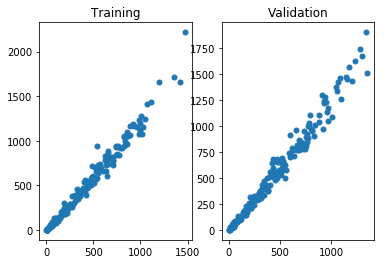

In [6]:
# Plota tentativa X sucesso para os sets de treinamento e validação
%matplotlib inline

# Set de treinamento
plt.subplot(1,2,1)
plt.plot(train[:,1], train[:,0], linestyle='None', marker='o', markersize=5)
plt.title('Training')

# Set de validação
plt.subplot(1,2,2)
plt.plot(val[:,1], val[:,0], linestyle='None', marker='o', markersize=5)
plt.title('Validation')

plt.show()

In [7]:
#Medida da correlação usando a Correlação Normalizada
def correlation(x, y):    
    x1 = (x - np.mean(x))
    y1 = (y - np.mean(y))
    
    num = np.sum(x1 * y1)
    div = np.sqrt( np.sum(x1 ** 2) * np.sum(y1 ** 2) )
    
    return num/div

In [8]:
#Cálculo dos Coeficientes b0 e b1
b1 = correlation(train[:,1], train[:,0]) * np.std(train[:,0]) / np.std(train[:,1])
b0 = np.mean(train[:,0]) - (b1 * np.mean(train[:,1]))
print(b0, b1)

-22.098783050014447 1.2452949933093558


In [12]:
#Calculo da predição de pontos baseado na tentativa de arremessos de 2 e 3 pontos
def compute_single_made(attempt):
    return b0 + b1*attempt

print(compute_single_made(67))

61.335981501712396


64.62902439178922


Text(0, 0.5, 'Points')

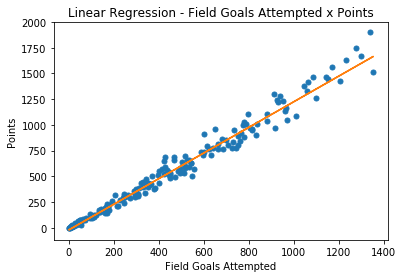

In [10]:
#Validação
pred_made = b0 + (b1 * val[:,1])
rmse = RMSE(pred_made, val[:,0])

print(rmse)

# Plot os pesos preditos de acordo com o set de validação
plt.plot(val[:,1], val[:,0], linestyle='None', marker='o', markersize=5)
plt.plot(val[:,1], pred_made)
plt.title('Linear Regression - Field Goals Attempted x Points')
plt.xlabel('Field Goals Attempted')
plt.ylabel('Points')

In [11]:
# Verifica a qualidade da previsão
score = r2_score(val[:,1], pred_made)
score

0.8772308135758302